In [2]:
import matplotlib.pyplot as plt
import numpy as np
import xlrd
from math import sqrt

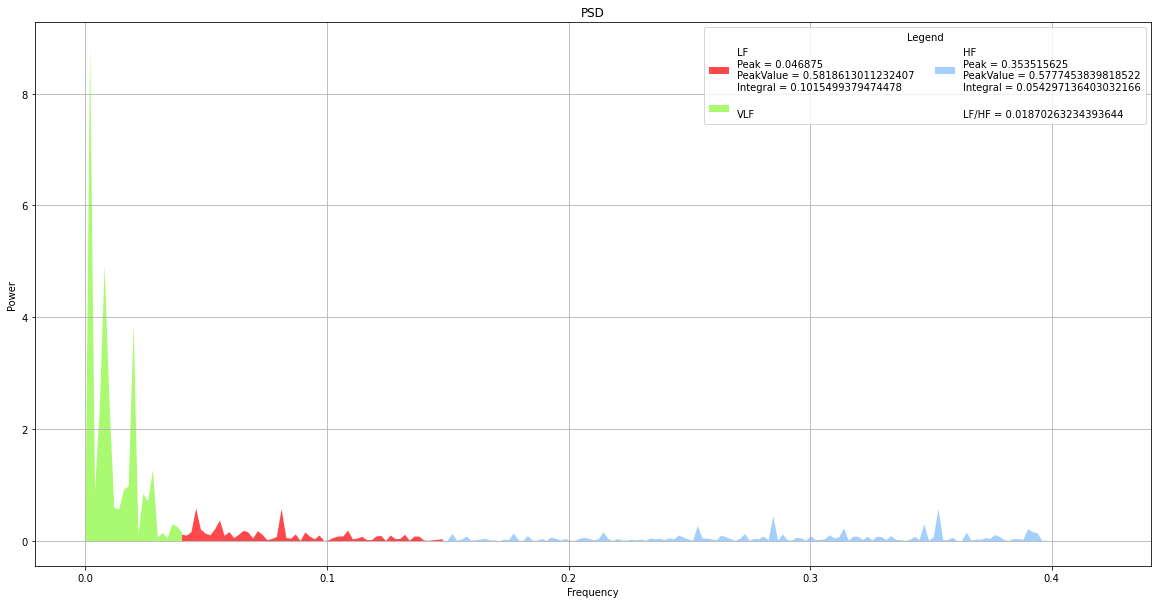

In [69]:
#Je lie mon doc excel
document = xlrd.open_workbook("DocTest.xls")
#J'importe ma feuille de calcul
feuille_1 = document.sheet_by_index(0)
#Puis je met les données voulues dans une liste
mesure = []
for i in range (1, 513): #ici, je sais que ma feuille possède 512 données
    mesure.append(feuille_1.cell_value(rowx=i, colx=1)) #ici, mes données sont colonne 1

#Création de la liste des fréquences
freq = [0]
for i in range(len(mesure)-1):
    freq.append(freq[i]+(1/(len(mesure))))

#Je fais la trasnformée de Fourrier
fourrier = [] 
fourrier = np.fft.fft(mesure)
fourrier[0] = 0 #La première valeur est aberrante; je la remplace

#Je crée la liste power
power = []
for i in range (len(mesure)):
    power.append((sqrt(2)*abs(fourrier[i]))*(sqrt(2)*abs(fourrier[i])))
power[0] = 0 #La première valeur est aberrante; je la remplace

#Je crée les absisses et les ordonées en enlevant la partie symétrique
X = []
Y = []
for i in range (len(mesure)):
    if (freq[i]<= max(freq)/2):
        X.append(freq[i])
        Y.append(power[i])

#On cherche le max en LF (0.04 - 0.15 Hz)
LF = []
for i in range (len(Y)):
    if (0.04 <=X[i]<= 0.15):
        LF.append(Y[i])
MaxLF = [0, max(LF)]

#On cherche le max en HF (0.15 - 0.40 Hz)
HF = []
for i in range (len(Y)):
    if (0.15<= X[i]<= 0.40):
        HF.append(Y[i])
MaxHF = [0, max(HF)]

#On relève l'absisse du max en LF
for i in range(len(X)):
    if Y[i] == MaxLF[1]:
        MaxLF[0] = X[i]

#On relève l'absisse du max en HF
for i in range(len(X)):
    if Y[i] == MaxHF[1]:
        MaxHF[0] = X[i]

#Remarque: LF et HF sont des liste de la forme (absisse, ordonée)

#Calcul de l'intégrale en LF
integraleLF = 0
for i in range(len(LF)):
    integraleLF += LF[i]
integraleLF /= len(LF)

#Calcul de l'intégrale en HF
integraleHF = 0
for i in range(len(HF)):
    integraleHF += HF[i]
integraleHF /= len(HF)

#Enfin, le graphique :
plt.figure(figsize=(20,10))
plt.grid()
plt.title('PSD')
plt.xlabel('Frequency')
plt.ylabel('Power')

#On crée une liste MF pour les couleurs
VLF = []
for i in range (len(Y)):
    if ( X[i]<= 0.04):
        VLF.append(Y[i])

#Ajout des couleurs de fond
c1 = plt.fill_between(np.arange(0,0.042, 0.042/len(VLF)),0,VLF,facecolor='xkcd:spring green')
c2 = plt.fill_between(np.arange(0.04,0.15, (0.15-0.04)/len(LF)),0,LF,facecolor='xkcd:light red')
c3 = plt.fill_between(np.arange(0.15,0.4, (0.4-0.15)/len(HF)),0,HF,facecolor='xkcd:baby blue')
c4 = plt.fill_between(np.arange(0.41,0.42, (0.42-0.41)/len(HF)),0,HF,facecolor='white')

#Légende
plt.legend([ c2, c1, c3, c4], [ "LF\nPeak = " + str(MaxLF[0]) + "\nPeakValue = " + str(MaxLF[1]) + "\nIntegral = " + str(integraleLF), "\nVLF", "HF\nPeak = " + str(MaxHF[0]) +  "\nPeakValue = " + str(MaxHF[1]) + "\nIntegral = " + str(integraleHF), "\nLF/HF = " + str((integraleLF/integraleHF)/100)],
              loc = 'upper right', ncol = 2, 
              frameon = True, markerscale = 2, title = 'Legend',
              borderpad = 0.5, labelspacing = 0.5)



